<a href="https://colab.research.google.com/github/Anshugit109/CODSOFT/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK 2 MOVIE RATING PREDICTION WITH PYTHON**

In [38]:
##importing the required module
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [39]:
## through module pandas reading the content of dataset
data=pd.read_csv("/content/IMDb Movies India.csv",encoding='ISO-8859-1')

In [40]:
data.shape ## this will show the shape of the dataset

(15509, 10)

In [41]:
# This will show the data
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [42]:
### for getting the type of data eg-int,float,object etc...
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [43]:
data.describe() ### this shows the various parameters of dataset such as mean,standard deviation etc..

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [44]:
data.isnull().sum() ##this will sum up the null values if any section having a NAN value or null value

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [45]:
data.dropna(inplace=True) ## this will drop the null values

In [46]:
data.isnull().sum()

,0
Name,0
Year,0
Duration,0
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   object 
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), object(9)
memory usage: 486.3+ KB


In [48]:
data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [49]:
data['Year'] = data['Year'].fillna(0)
data['Year'] = data['Year'].replace(r'[()]', '', regex=True).astype(int) ##this will convert thr 'year' column values to integer data types for further ml operation
print(data['Year'])

1        2019
3        2019
5        1997
6        2005
8        2012
         ... 
15493    2015
15494    2001
15503    1989
15505    1999
15508    1998
Name: Year, Length: 5659, dtype: int64


In [50]:
## this will convert the string values to numeric data type
data['Duration'] = pd.to_numeric(data['Duration'].str.replace(' min', ''))
genres = data['Genre'].value_counts()
genres

,count
Genre,
Drama,844
"Drama, Romance",332
"Action, Crime, Drama",329
"Action, Drama",206
"Comedy, Drama",205
...,...
"Action, Comedy, War",1
"Mystery, Sci-Fi",1
"Horror, Romance, Sci-Fi",1


/tmp/ipython-input-51-3657525020.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Genre'].fillna(data['Genre'].mode()[0], inplace=True)


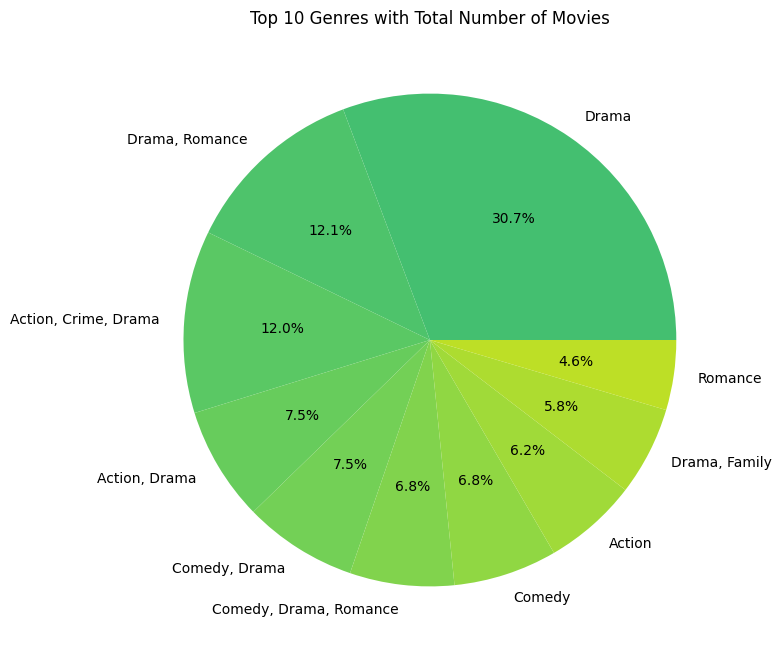

In [51]:
data['Genre'] = data['Genre'].str.split(', ')
data = data.explode('Genre')
data['Genre'].fillna(data['Genre'].mode()[0], inplace=True)


# Get the top 10 genres and their values
top_genres = genres.head(10)

plt.figure(figsize=(8, 8))
colors = plt.cm.viridis(np.linspace(0.7, 0.9, len(top_genres)))
# Plot the pie chart
plt.pie(top_genres.values, labels=top_genres.index, autopct='%1.1f%%', colors=colors)

# Add title
plt.title('Top 10 Genres with Total Number of Movies')

# Show plot
plt.show()

/tmp/ipython-input-52-3784039726.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.index, y=top_directors.values, palette='magma')


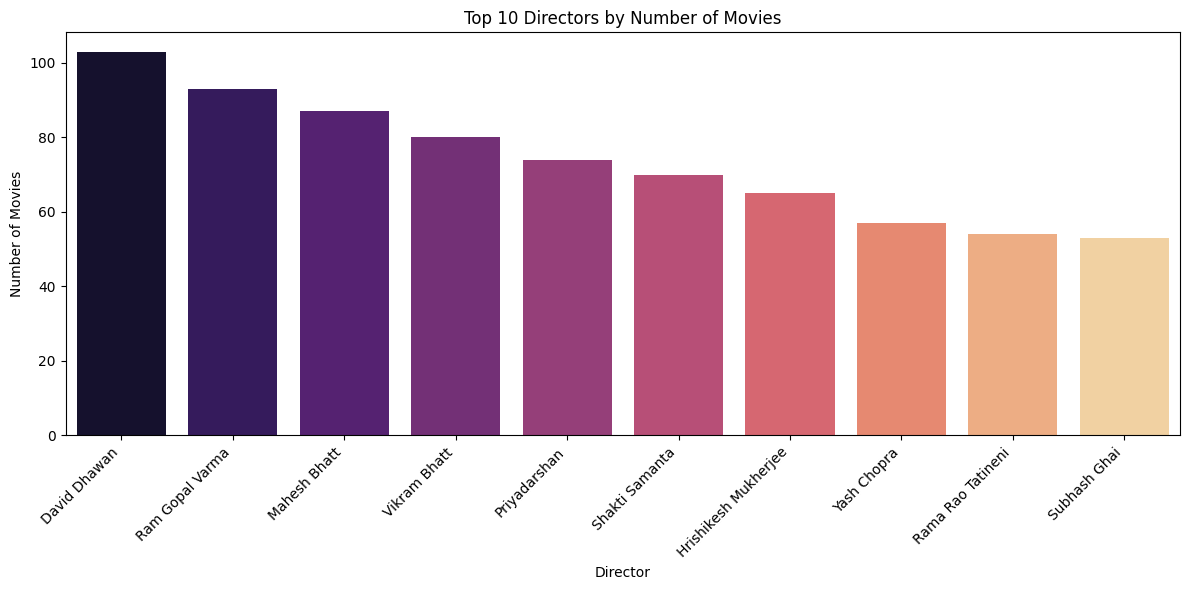

In [52]:
# Get top 10 directors by number of movies
top_directors = data['Director'].value_counts().head(10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=top_directors.index, y=top_directors.values, palette='magma')

# Beautify
plt.xticks(rotation=45, ha='right')  # Rotate director names for readability
plt.title('Top 10 Directors by Number of Movies')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()

In [53]:
Year = data['Year'].value_counts()
Year

,count
Year,
2019,423
2013,374
2017,372
2018,358
2015,353
...,...
1939,4
1934,3
1931,3


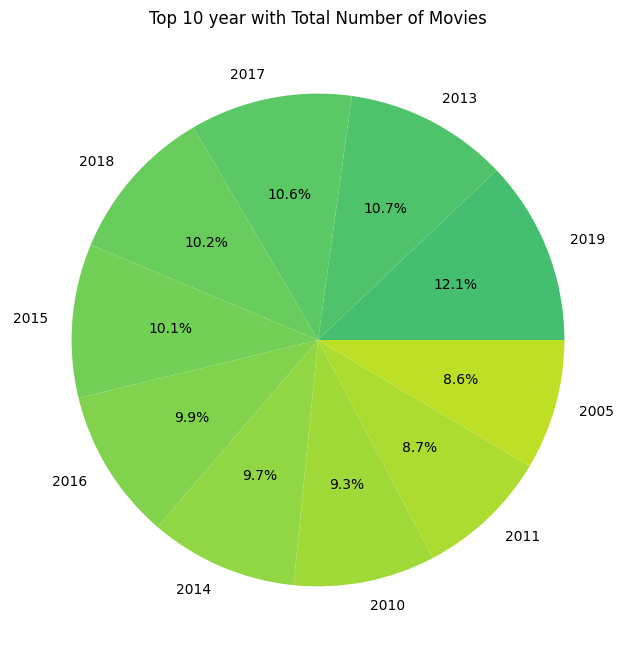

In [54]:
top_Year = Year.head(10)

plt.figure(figsize=(8, 8))
colors = plt.cm.viridis(np.linspace(0.7, 0.9, len(top_Year)))
# Plot the pie chart
plt.pie(top_Year.values, labels=top_Year.index, autopct='%1.1f%%', colors=colors)

# Add title
plt.title('Top 10 year with Total Number of Movies')

# Show plot
plt.show()

In [62]:
test_data = data.drop(columns=['Rating'])
test_data

,Name,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,Comedy,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,#Yaaram,2019,110,Romance,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Comedy,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Drama,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
...,...,...,...,...,...,...,...,...,...
15503,Zulm Ki Zanjeer,1989,125,Drama,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,1999,129,Action,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15505,Zulmi,1999,129,Drama,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15508,Zulm-O-Sitam,1998,130,Action,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [63]:
ratings = data['Rating']
ratings

,Rating
1,7.0
3,4.4
3,4.4
5,4.7
5,4.7
...,...
15503,5.8
15505,4.5
15505,4.5
15508,6.2


In [69]:
def clean_duration(duration):
    if isinstance(duration, str):
        return float(''.join(filter(str.isdigit, duration)))
    return duration

#Applying the custom function
data['Duration'] = data['Duration'].apply(clean_duration)
data['Votes'] = data['Votes'].astype(str)
data['Votes'] = data['Votes'].str.replace(',', '').astype(int)
data['Year'] = data['Year'].astype(str)
data['Year'] = data['Year'].str.strip('()').astype(int)
data.info()
data

<class 'pandas.core.frame.DataFrame'>
Index: 11979 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      11979 non-null  object 
 1   Year      11979 non-null  int64  
 2   Duration  11979 non-null  int64  
 3   Genre     11979 non-null  object 
 4   Rating    11979 non-null  float64
 5   Votes     11979 non-null  int64  
 6   Director  11979 non-null  object 
 7   Actor 1   11979 non-null  object 
 8   Actor 2   11979 non-null  object 
 9   Actor 3   11979 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 1.0+ MB


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,#Yaaram,2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
...,...,...,...,...,...,...,...,...,...,...
15503,Zulm Ki Zanjeer,1989,125,Drama,5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,1999,129,Action,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15505,Zulmi,1999,129,Drama,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15508,Zulm-O-Sitam,1998,130,Action,6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(test_data, ratings, test_size=0.25, random_state=52)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(8984, 9) (2995, 9) (8984,) (2995,)


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
ridge_model = Ridge()
ridge_model.fit(X_train, Y_train)
Ridge()

X_test_prediction = ridge_model.predict(X_test)

mse = mean_squared_error(Y_test, X_test_prediction)
mae = mean_absolute_error(Y_test, X_test_prediction)
r2 = r2_score(Y_test, X_test_prediction)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared (R2) Score:", r2)

results = pd.DataFrame({
    'Actual': Y_test,  # Actual target values
    'Predicted': X_test_prediction  # Predicted target values
})

results['Squared Error'] = (results['Actual'] - results['Predicted'])**2  # Squared errors
results['Absolute Error'] = abs(results['Actual'] - results['Predicted'])  # Absolute errors
results